<a href="https://colab.research.google.com/github/scotteria/Ideal-Crop-Classification/blob/main/capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow kaggle pandas numpy matplotlib

In [4]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from  kaggle.api.kaggle_api_extended import KaggleApi

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'plantvillage-dataset' dataset.
Path to dataset files: /kaggle/input/plantvillage-dataset


In [6]:
for root, dirs, files in os.walk(path):
  print(f"Directory: {root}")
  for name in files:
    print(f" - {name}")

Streaming output truncated to the last 5000 lines.
 - d7abcece-f573-4820-8593-7a210f09ba28___Mary_HL 9183.JPG
 - 1e2f76bb-af16-4cc5-9fed-8efa9a68d6a3___Mary_HL 9142.JPG
 - fa3964a3-4eb8-49c8-b62c-b57e3d121996___Mary_HL 9162.JPG
 - a8530446-f16a-4c42-abb9-bbe2d83bb94d___Mary_HL 6353.JPG
 - e6914eed-6170-4d2f-98d6-390a1c8600f2___Mary_HL 6297.JPG
 - e8024774-229e-4fb7-a239-f8052db42a9f___Mary_HL 6407.JPG
 - e1b5fa88-4c95-4845-a422-20c96d77b384___Mary_HL 9229.JPG
 - 5e44a128-215f-41a5-8da8-67b62f167afd___Mary_HL 6344.JPG
 - 8e5806cd-b3f0-4737-8be0-9b7726d8b33c___Mary_HL 9165.JPG
 - 9e64e964-c4c6-4cf7-80e4-ef0a4ff7d386___Mary_HL 6350.JPG
 - a88a1dba-2f73-4074-ab3d-a1ff93417591___Mary_HL 9243.JPG
 - 6e46f8bd-3bbd-4a8d-945c-c3959c01f0fd___Mary_HL 9294.JPG
 - b1291c35-66cd-4720-a9d3-c81ab4c87235___Mary_HL 6290.JPG
 - 23ba8894-db3b-4a55-8a7b-703bf9ddaccc___Mary_HL 9138.JPG
 - 05f26de9-3f26-44f8-9ad4-cd83952399b3___Mary_HL 9140.JPG
 - 7ea7a4b0-d404-4355-acfb-c0fa23d976b0___Mary_HL 6342.JPG
 - 9f

Let's break down why this error is happening and how to fix it.

In Google Colab, code is executed cell by cell. When you run a cell, any variables defined within that cell are available for use in subsequent cells. However, if you try to use a variable in a cell before the cell where it's defined has been executed, you'll get a `NameError`.

In this case, the `path` variable, which stores the location of your downloaded dataset, is defined in the cell where you used `kagglehub.dataset_download()`.

In [6]:
# This is the cell that defines the 'path' variable
# It downloads the dataset and sets the 'path' variable to its location
import kagglehub
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'plantvillage-dataset' dataset.
Path to dataset files: /kaggle/input/plantvillage-dataset


In [8]:
import os
import shutil
import random

# Use the downloaded dataset path
dataset_dir = "/kaggle/input/plantvillage-dataset/plantvillage dataset"
 # choose color / segmented / grayscale
output_dir = "PlantVillage_split"
split_ratio = 0.8

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_imgs, val_imgs = images[:split_idx], images[split_idx:]

    # Create train/val dirs
    train_class_dir = os.path.join(output_dir, "train", class_name)
    val_class_dir = os.path.join(output_dir, "val", class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # Copy files
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))

print("Dataset split into train/val folders")

IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Bacterial_spot'

In [ ]:
import os

def count_images(folder):
    counts = {}
    total = 0
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png'))])
        counts[class_name] = num_images
        total += num_images
    return counts, total

# Count training images
train_counts, train_total = count_images("PlantVillage_split/train")
val_counts, val_total = count_images("PlantVillage_split/val")

print(" Training set:")
for cls, num in train_counts.items():
    print(f"{cls}: {num} images")
print(f"TOTAL = {train_total}")

print("\n Validation set:")
for cls, num in val_counts.items():
    print(f"{cls}: {num} images")
print(f"TOTAL = {val_total}")


 Training set:
Tomato___Septoria_leaf_spot: 1416 images
Peach___Bacterial_spot: 1837 images
Strawberry___Leaf_scorch: 887 images
Tomato___healthy: 1272 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 410 images
Apple___Apple_scab: 504 images
Potato___Late_blight: 800 images
Corn_(maize)___Northern_Leaf_Blight: 788 images
Grape___healthy: 338 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 860 images
Tomato___Target_Spot: 1123 images
Pepper,_bell___healthy: 1182 images
Potato___Early_blight: 800 images
Grape___Esca_(Black_Measles): 1106 images
Tomato___Tomato_mosaic_virus: 298 images
Corn_(maize)___Common_rust_: 953 images
Pepper,_bell___Bacterial_spot: 797 images
Tomato___Bacterial_spot: 1701 images
Squash___Powdery_mildew: 1468 images
Potato___healthy: 121 images
Corn_(maize)___healthy: 929 images
Apple___Black_rot: 496 images
Tomato___Late_blight: 1527 images
Tomato___Early_blight: 800 images
Cherry_(including_sour)___Powdery_mildew: 841 images
Apple___Cedar_apple_rust:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
import tensorflow as tf

# Paths to train and validation sets
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")

# Parameters
img_size = (224, 224)   # resize all images
batch_size = 32

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Optional: performance boost
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Check classes
class_names = train_ds.class_names
print("Classes:", class_names)
print("Number of classes:", len(class_names))


Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.
Number of classes: 38


In [ ]:
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the base model and the complete model (initial setup)
# This is included here to address the NameError and ensure base_model is defined
# In a typical workflow, this might be in a separate cell for initial training.
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights="imagenet"
)

# Freeze the base model for the initial training phase
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")  # multi-class output
])

# Compile the model for the initial training phase
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model defined and compiled for initial training phase.")
model.summary()

# --- Start of Fine-tuning Phase ---

# Phase 2: Fine-tune deeper layers
print("\nStarting fine-tuning phase setup...")

# Unfreeze the base model
base_model.trainable = True

# It's common to keep some early layers frozen to retain low-level features
# Let's find a suitable layer to unfreeze from based on base_model.summary()
# For MobileNetV2, layer 100 might be a reasonable starting point to unfreeze layers after.
# You might need to adjust this number based on the specific base model architecture and desired fine-tuning depth.

# Freeze all layers in the base model first (redundant after base_model.trainable = True, but good for clarity)
# We only unfreeze from a certain layer onwards.
for layer in base_model.layers:
    layer.trainable = False

# Then unfreeze layers starting from a certain index
# You might need to adjust this index based on the base model's architecture
fine_tune_from_layer = 100 # Example: Unfreeze layers from index 100 onwards
# You might need to find the actual layer index or name from model.summary() output
# As a safer alternative, you could unfreeze based on layer name or type if indices are not reliable across versions.
# For simplicity and to address the NameError, we use index here as in your original code.

if fine_tune_from_layer < len(base_model.layers):
    for layer in base_model.layers[fine_tune_from_layer:]:
        layer.trainable = True
    print(f"Unfroze layers in base_model starting from index {fine_tune_from_layer}.")
else:
    print(f"Fine-tune layer index {fine_tune_from_layer} is out of bounds for base_model with {len(base_model.layers)} layers.")
    print("No layers unfrozen for fine-tuning.")


# Re-compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),  # smaller LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model re-compiled for fine-tuning.")
model.summary() # Check which layers are now trainable

# You would typically run model.fit() again after this cell for the fine-tuning training.

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model defined and compiled for initial training phase.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,686 (9.90 MB)

 Trainable params: 337,702 (1.29 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting fine-tuning phase setup...
Unfroze layers in base_model starting from index 100.
Model re-compiled for fine-tuning.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,686 (9.90 MB)

 Trainable params: 2,199,142 (8.39 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3  # increase if you want better performance
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 297s 197ms/step - accuracy: 0.3341 - loss: 2.6965 - val_accuracy: 0.7341 - val_loss: 1.0165
Epoch 2/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 218s 160ms/step - accuracy: 0.7588 - loss: 0.8881 - val_accuracy: 0.8772 - val_loss: 0.4251
Epoch 3/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 259s 158ms/step - accuracy: 0.8427 - loss: 0.5256 - val_accuracy: 0.9148 - val_loss: 0.2823


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# True labels as indices
y_true = val_generator.classes

# Class labels in correct order
class_labels = list(val_generator.class_indices.keys())

# Predictions
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred_indices = np.argmax(y_pred_probs, axis=1)

# Metrics
print("Accuracy Score:", accuracy_score(y_true, y_pred_indices))

print("\nClassification Report:")
print(classification_report(y_true, y_pred_indices, target_names=class_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_indices))


340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step
Accuracy Score: 0.04312247149687385

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.01      0.01      0.01       126
                                 Apple___Black_rot       0.01      0.02      0.02       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.02      0.02      0.02       329
                               Blueberry___healthy       0.01      0.01      0.01       301
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       211
                 Cherry_(including_sour)___healthy       0.01      0.01      0.01       171
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.01      0.01       103
                       Corn_(maize)___Common_rust_       0.02      0

Confusion Matrix:
 [[  1   1   1 ...   4   0   2]
 [  2   2   1 ...  12   2   7]
 [  1   1   0 ...   4   0   1]
 ...
 [  8  19   5 ... 101   4  21]
 [  1   2   1 ...   3   0   2]
 [  2   2   1 ...  33   0   8]]

Accuracy Score: 0.04312247149687385

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.01      0.01      0.01       126
                                 Apple___Black_rot       0.01      0.02      0.02       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.02      0.02      0.02       329
                               Blueberry___healthy       0.01      0.01      0.01       301
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       211
                 Cherry_(including_sour)___healthy       0.01      0.01      0.01 

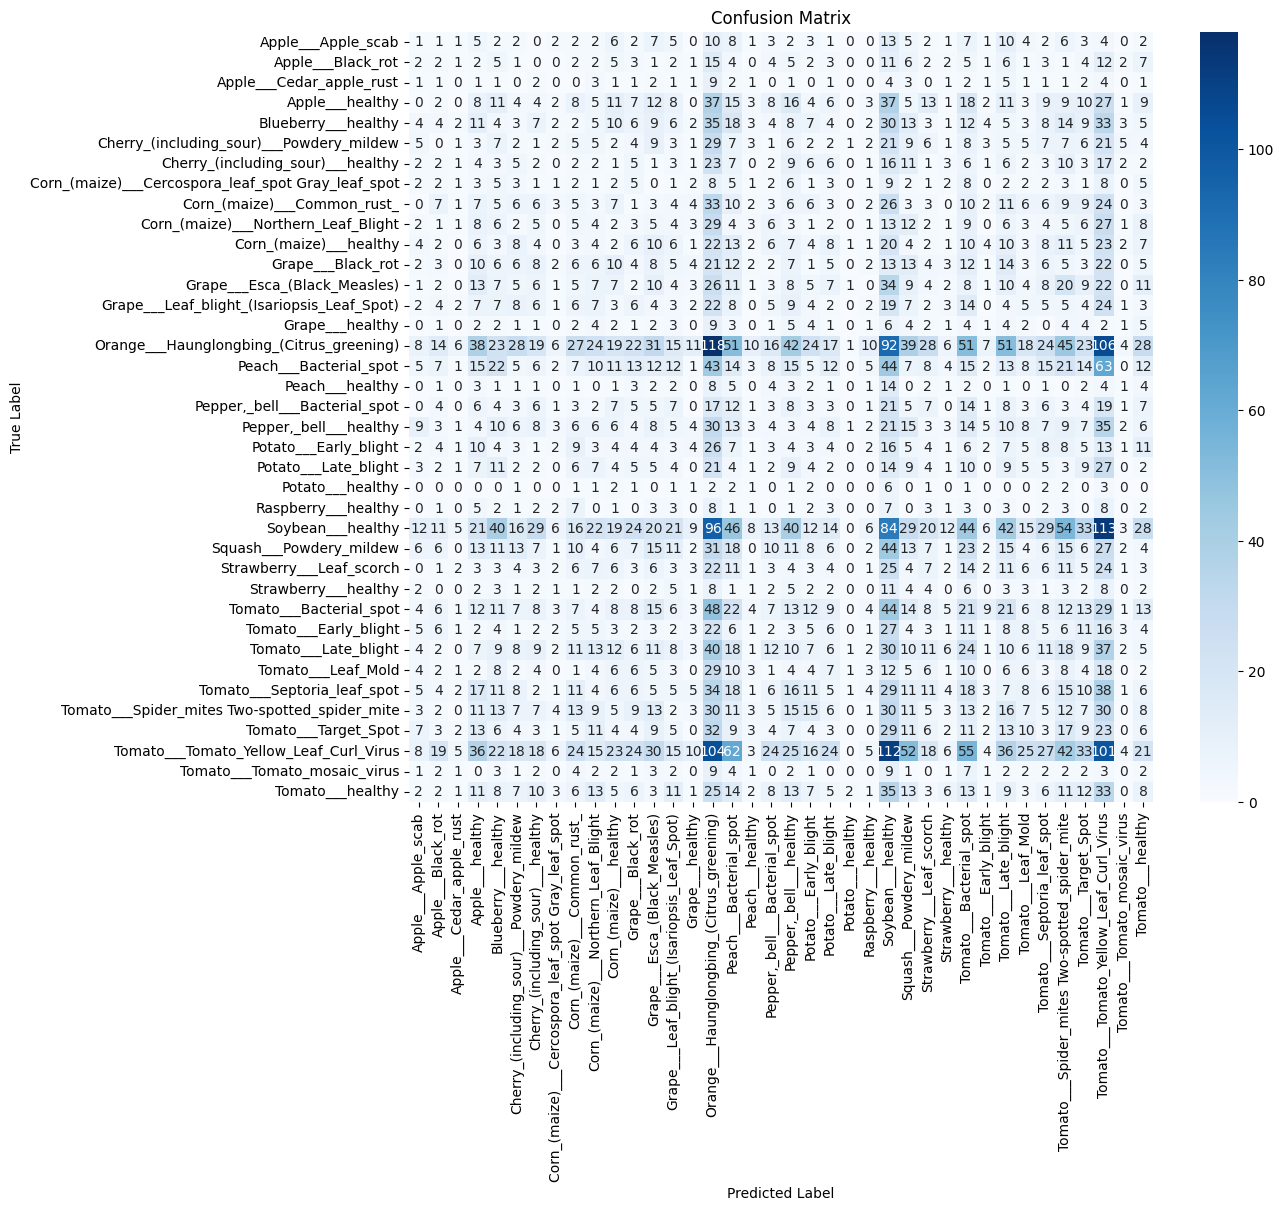

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_indices)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_indices)

# Classification report
report = classification_report(y_true, y_pred_indices, target_names=class_labels)

print("Confusion Matrix:\n", cm)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", report)

# visualize
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()